<a href="https://colab.research.google.com/github/Derrick-Majani/Linear_Regression-Anime/blob/main/Copy_of_Sam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rates

In [ ]:
import pandas as pd

# Original monthly data
data = {
    'YEAR': [2018]*12 + [2019]*12 + [2020]*12,
    'MONTH': ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
              'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUNE', 'JULY', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC',
              'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUNE', 'JULY', 'AUG', 'SEPT', 'OCT', 'NOV', 'DEC'],
    'Lending': [13.65, 13.68, 13.49, 13.24, 13.25, 13.22, 13.1, 12.78, 12.66, 12.61, 12.55, 12.51,
                12.5, 12.47, 12.51, 12.5, 12.47, 12.47, 12.39, 12.46, 12.47, 12.43, 12.38, 12.24,
                12.29, 12.19, 12.09, 11.92, 11.95, 11.89, 11.94, 11.94, 11.75, 11.98, 11.99, 12.02]
}

rates_df = pd.DataFrame(data)

# Map months to quarters
month_to_quarter = {
    'JAN': 'Q1', 'FEB': 'Q1', 'MAR': 'Q1',
    'APR': 'Q2', 'MAY': 'Q2', 'JUN': 'Q2',
    'JUL': 'Q3', 'AUG': 'Q3', 'SEP': 'Q3',
    'OCT': 'Q4', 'NOV': 'Q4', 'DEC': 'Q4',
    'JUNE': 'Q2', 'JULY': 'Q3', 'SEPT': 'Q3'
}

# Add a Quarter column
rates_df['Quarter'] = rates_df['MONTH'].map(month_to_quarter)

# Aggregate numeric data (Lending) by Quarter and Year
rates_quarterly = rates_df.groupby(['YEAR', 'Quarter'], as_index=False)['Lending'].mean()

# Map quarters to starting months
quarter_to_month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}

# Add the starting month for each quarter to create a proper Date column
rates_quarterly['Date'] = rates_quarterly['YEAR'].astype(str) + '-' + rates_quarterly['Quarter'].map(quarter_to_month) + '-01'

# Convert the corrected Date column to datetime format
rates_quarterly['Date'] = pd.to_datetime(rates_quarterly['Date'])

# Check the result
rates_quarterly


,YEAR,Quarter,Lending,Date
0,2018,Q1,13.606667,2018-01-01
1,2018,Q2,13.236667,2018-04-01
2,2018,Q3,12.846667,2018-07-01
3,2018,Q4,12.556667,2018-10-01
4,2019,Q1,12.493333,2019-01-01
5,2019,Q2,12.480000,2019-04-01
6,2019,Q3,12.440000,2019-07-01
7,2019,Q4,12.350000,2019-10-01
8,2020,Q1,12.190000,2020-01-01
9,2020,Q2,11.920000,2020-04-01


## Copy Data

In [ ]:
# Load the Copy-Performance data
copy_data = {
    'Bank': ['Equity', 'KCB Bank', 'Cooperative Bank of Kenya', 'NCBA Bank'],
    '2019-01-01': [223565307, 417230271, 245410302, 121503411],
    '2019-03-01': [229289421, 424828537, 249798926, 111520211],
    '2019-06-01': [240595173, 435726167, 255814491, 109381939],
    '2019-09-01': [263385715, 442008582, 267272041, 116703635],
    '2019-12-01': [276863043, 447154955, 265332776, 227868480],
    '2020-03-01': [284234137, 463085623, 274780327, 223696774],
    '2020-06-01': [293741008, 464006913, 270795433, 225738081],
    '2020-09-01': [302424380, 475667131, 282894952, 225177133],
    '2020-12-01': [313065151, 492537561, 280522176, 224420668]
}
copy_df = pd.DataFrame(copy_data)
copy_df


,Bank,2019-01-01,2019-03-01,2019-06-01,2019-09-01,2019-12-01,2020-03-01,2020-06-01,2020-09-01,2020-12-01
0,Equity,223565307,229289421,240595173,263385715,276863043,284234137,293741008,302424380,313065151
1,KCB Bank,417230271,424828537,435726167,442008582,447154955,463085623,464006913,475667131,492537561
2,Cooperative Bank of Kenya,245410302,249798926,255814491,267272041,265332776,274780327,270795433,282894952,280522176
3,NCBA Bank,121503411,111520211,109381939,116703635,227868480,223696774,225738081,225177133,224420668


##  Step 2: Aggregate Quarterly Lending Data

In [ ]:
# Transpose the Copy table to make dates the index
copy_df_transposed = copy_df.set_index('Bank').transpose()

# Calculate overall lending by summing across all banks for each quarter
copy_df_transposed['Overall Lending'] = copy_df_transposed.sum(axis=1)

# Reset index for easier merging
copy_df_transposed = copy_df_transposed.reset_index()
copy_df_transposed.rename(columns={'index': 'Date'}, inplace=True)
copy_df_transposed['Date'] = pd.to_datetime(copy_df_transposed['Date'])
copy_df_transposed = copy_df_transposed[['Date', 'Overall Lending']]

copy_df_transposed


Bank,Date,Overall Lending
0,2019-01-01,1007709291
1,2019-03-01,1015437095
2,2019-06-01,1041517770
3,2019-09-01,1089369973
4,2019-12-01,1217219254
5,2020-03-01,1245796861
6,2020-06-01,1254281435
7,2020-09-01,1286163596
8,2020-12-01,1310545556


## Step 4: Merge the Two DataFrames

In [ ]:
# Ensure Date columns are in datetime format
rates_quarterly['Date'] = pd.to_datetime(rates_quarterly['Date'])
copy_df_transposed['Date'] = pd.to_datetime(copy_df_transposed['Date'])

# Round dates in copy_df_transposed to the nearest quarter
copy_df_transposed['Date'] = copy_df_transposed['Date'].dt.to_period('Q').dt.start_time

# Merge the datasets
merged_df = pd.merge(copy_df_transposed, rates_quarterly, on='Date', how='inner')

# Check the merged dataframe
merged_df


,Date,Overall Lending,YEAR,Quarter,Lending
0,2019-01-01,1007709291,2019,Q1,12.493333
1,2019-01-01,1015437095,2019,Q1,12.493333
2,2019-04-01,1041517770,2019,Q2,12.480000
3,2019-07-01,1089369973,2019,Q3,12.440000
4,2019-10-01,1217219254,2019,Q4,12.350000
5,2020-01-01,1245796861,2020,Q1,12.190000
6,2020-04-01,1254281435,2020,Q2,11.920000
7,2020-07-01,1286163596,2020,Q3,11.876667
8,2020-10-01,1310545556,2020,Q4,11.996667


## Step 5: Perform Regression Analysis

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


## Define Missing Values

In [ ]:
# Check for missing values
print(merged_df.isnull().sum())



Date               0
Overall Lending    0
YEAR               0
Quarter            0
Lending            0
dtype: int64


In [ ]:
# Confirm the data types
print(merged_df.dtypes)


Date               datetime64[ns]
Overall Lending             int64
YEAR                        int64
Quarter                    object
Lending                   float64
dtype: object


### Define Variables

In [ ]:
# Independent variable: Lending Rates
X = merged_df['Lending']

# Dependent variable: Overall Lending
Y = merged_df['Overall Lending']

# Add a constant to the independent variable (for intercept in regression)
X = sm.add_constant(X)


In [ ]:
# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Overall Lending   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     29.66
Date:                Fri, 04 Apr 2025   Prob (F-statistic):           0.000960
Time:                        18:12:16   Log-Likelihood:                -172.44
No. Observations:                   9   AIC:                             348.9
Df Residuals:                       7   BIC:                             349.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.413e+09   9.64e+08      6.651      0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


-  Actionable Insights for Your Boss
Based on the regression results:

- Key Finding:

- There is a strong, statistically significant negative relationship between Lending Rates and Overall Lending.
As lending rates decrease, overall lending increases significantly.
Quantitative Insight:

- For every 1-unit decrease in lending rates, overall lending increases by approximately 428.6 million.
Confidence in Results:

- The model explains 80.9% of the variation in lending, and the relationship is statistically significant (P = 0.001).
-  Recommendations for Submission

- Objective: To analyze the relationship between lending rates and overall lending.
- Key Results:
Lending rates significantly influence overall lending (P = 0.001).
A decrease in lending rates leads to an increase in overall lending, as hypothesized.
- The model explains 80.9% of the variation in lending.
Conclusion: The regression analysis confirms that lower lending rates drive higher overall lending, which aligns with expectations.

### Visualize the Results

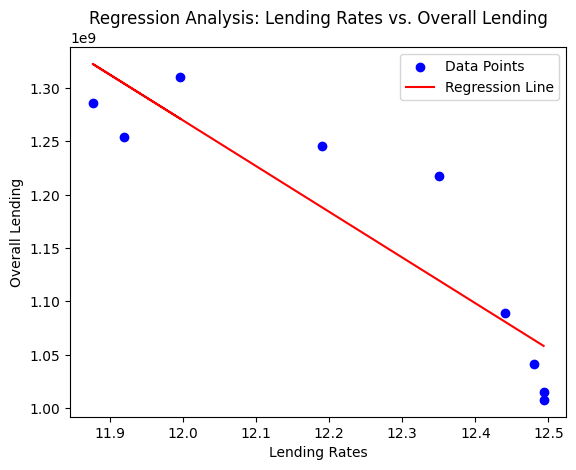

In [ ]:
# Scatter plot
plt.scatter(merged_df['Lending'], merged_df['Overall Lending'], color='blue', label='Data Points')

# Regression line
plt.plot(merged_df['Lending'], model.predict(X), color='red', label='Regression Line')

# Labels and title
plt.xlabel('Lending Rates')
plt.ylabel('Overall Lending')
plt.title('Regression Analysis: Lending Rates vs. Overall Lending')
plt.legend()
plt.show()


- Objective: To visually examine the relationship between lending rates and overall lending.
- Key Findings:
- The scatter plot confirms a strong negative relationship between Lending Rates and Overall Lending.
The regression line shows that lower lending rates lead to increased overall lending, consistent with the statistical analysis.
The data points are closely aligned to the regression line, reflecting the reliability of the model.
- Conclusion: The visual evidence supports the hypothesis that reducing lending rates drives higher overall lending.